####  Rainfall-2
Usually, we are given the rainfall at some rain gauges, and we want to make the isohyete (contour)
plot of the rainfall. To demonstrate this situation, fist we shall generate locations (x,y) and rainfall
for ten stations using random numbers. The generated locations of the rain gauges is shown in the figure. 

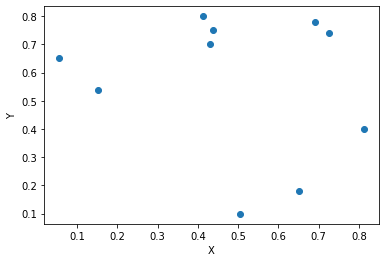

In [1]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt

#generate locations and rainfall
x = np.random.rand(10)
y = np.random.rand(10)
rain = 10*np.random.rand(10)

#plot the locations
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Add blank lines after a section of code, and comment on the top of section what it is doing.
This increases the readability of the code. The plt.scatter() makes the scatter plot, i.e. the dots
are plotted instead of lines. When there is no order in the data with respect to their position in the
array, then scatter plot is used. Like in this case, it is possible that two stations which are close by,
but might be placed at a distance in the array.

To prepare a contour map of the precipitation first the precipitation has to be generated again
Then we need to generate the grid with regular spacing having the same extent as of the locations 
of rainfall gauges. Then, from the given location and rainfall data, we need to compute data at 
regular grid using some interpolation scheme. 

After this contour maps can be obtained. The griddata function of the
scipy.interpolate library is useful in obtaining the gridded data (data at regular grid). When
we need only one or few functions from the library, it is better to call them explicitly, e.g.
from scipy.interpolate import griddata, like in the following example. We use meshgrid
function of numpy library, to create the mesh from the given x and y vectors.


In [2]:
time = np.linspace(0,100,21) # create time variable
time

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [3]:
rainfall = np.random.rand(21) # generate rainfall
rainfall

array([0.97183745, 0.69628705, 0.39738759, 0.03305578, 0.64581392,
       0.71576162, 0.27325946, 0.86125377, 0.88503473, 0.61320952,
       0.79085705, 0.60087153, 0.52836592, 0.33160469, 0.29624085,
       0.22633666, 0.33781835, 0.28142395, 0.38840621, 0.25201378,
       0.50695786])

In [4]:
from scipy.interpolate import griddata

#generate the desired grid, where rainfall is to be interpolated
X,Y = np.meshgrid(np.linspace(0,1,1000), np.linspace(0,1,1000))

#perform the gridding
grid_rain = griddata((x,y), rain, (X, Y))

Now, we can make the contour plot of the gridded data, which is made by plt.contourf() function.
The contourf makes filled contours, while contour() provides simple contour. Try using the
contour instead of contourf, and you will see the difference. We begin by clearing the current figure
by using the plt.clf(), as there might be some existing figure in the memory especially if you
are following all the examples in the same session. We are also overlaying the locations of rainfall
gauges using the plt.scatter(). The s and c are used to define the size and color of the markers
respectively. The plt.xlim() and plt.ylim() limits the extent of the x and y axis respectively.

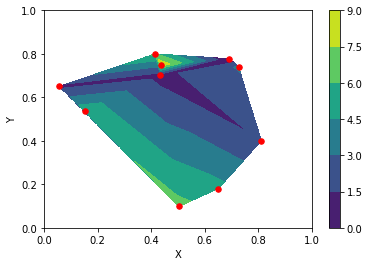

In [5]:
plt.clf()
plt.contourf(X,Y,grid_rain)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y, s=30, c='r')
plt.xlim((0,1))
plt.ylim((0,1))
plt.savefig('rain_grid.png')
